In [1]:
import sys
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import numpy as np

sys.path.append('/home/jsn295/Documents/Weave/')
from Weave.utils import get_nhmin, get_nhplus, get_europe, get_nhblock, get_nhnorm

In [2]:
clusterpath = '/home/jsn295/Documents/Weave/t2m-q095.nc'
clusters = xr.open_dataarray(clusterpath).sel(nclusters = 15) # level of 15, cluster 9
output_cluster = clusters.where(clusters == 9.0, other = np.nan)

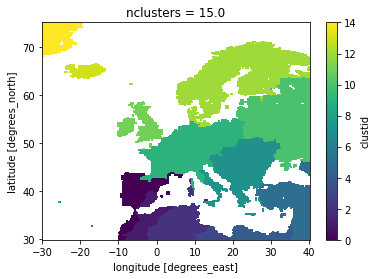

In [5]:
clusters.plot()

In [2]:
regions = [get_nhmin(), get_nhnorm(), get_nhplus(), get_nhblock(), get_europe()]
variables = ['snowc,siconc','z300','sst','t850','swvl13,swvl4,transp,tcc']
styles = [(0,(5,5)),'dotted','dashdot','dashed','solid']

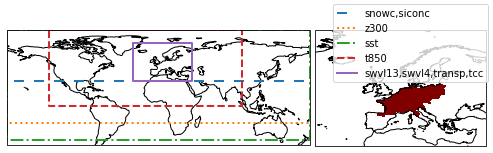

In [62]:
left, width = 0.1, 0.6
bottom, height = 0.1, 1
spacing = 0.01

rect_input = [left, bottom, width, height]
rect_output = [left + width + spacing, bottom, 0.34, height]

# start with a square Figure
fig = plt.figure(figsize=(7, 3))

ax = fig.add_axes(rect_input, projection = ccrs.PlateCarree())
ax_output = fig.add_axes(rect_output, projection = ccrs.PlateCarree())
for eur, var, linesty in zip(regions,variables,styles):
    ax.plot([eur[2], eur[4],eur[4],eur[2], eur[2]], [eur[1], eur[1], eur[3], eur[3], eur[1]], linewidth=2,
            transform=ccrs.PlateCarree(), label = var, linestyle = linesty,
           )
ax.coastlines()
ax_output.pcolormesh(output_cluster.longitude, output_cluster.latitude, output_cluster.values,
                            transform = ccrs.PlateCarree(), cmap = 'jet_r', label = 't2m region')
ax_output.coastlines()
ax_output.set_extent((eur[2],eur[4],eur[3],eur[1]))
fig.legend()
plt.show()

### Now separate

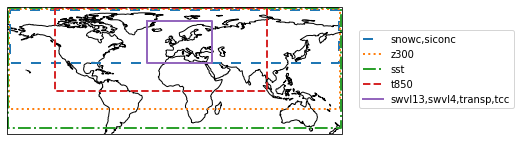

In [12]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection = ccrs.PlateCarree()))
displacements = [3,2,1,1,0]
for eur, var, linesty, d in zip(regions,variables,styles, displacements):
    ax.plot([eur[2]+d, eur[4]-d,eur[4]-d,eur[2]+d, eur[2]+d], [eur[1]-d, eur[1]-d, eur[3], eur[3], eur[1]-d], linewidth=2,
            transform=ccrs.PlateCarree(), label = var, linestyle = linesty,
           )
ax.coastlines()
ax.legend(loc = (1.05,0.2))
plt.savefig('/home/jsn295/ownCloud/Documents/paper_2/Draft/figures/domains.png', dpi = 91, bbox_inches = 'tight')

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection = ccrs.Mollweide()))
ax.pcolormesh(output_cluster.longitude, output_cluster.latitude, output_cluster.values,
                            transform = ccrs.PlateCarree(), cmap = 'inferno_r', label = 't2m region')
ax.coastlines(color = 'white')
ax.set_extent((-20,30,35,68))
plt.savefig('test.svg')